In [2]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from IPython.display import display, HTML
from pyvis import network
import networkx as nx

In [4]:
df = pd.read_csv("/kaggle/input/social-network/Connections.csv")
df.head(5)

,Company,Position,Connected On
0,VisionNLP,Data Science Intern,16-Nov-21
1,NaN,NaN,16-Nov-21
2,Brane Enterprises pvt ltd,Data Scientist,16-Nov-21
3,Anchanto,Data Scientist,15-Nov-21
4,Accenture,Senior Analyst,14-Nov-21


In [5]:
#df = (df.drop(columns = ['First_Name', 'Last_Name', 'Email_Address']))
#df.info()

df_post = df['Position'].value_counts().reset_index()
df_post.columns = ['Position', 'count']
df_post = df_post.sort_values(by = "count", ascending = False)
df_post.head(5)

,Position,count
0,Data Scientist,7
1,Software Engineer,3
2,Data Science Intern,2
3,IT Specialist,2
4,Machine Learning Engineer,2


In [ ]:
##Conditional graph
#df_post_reduced = df_post.loc[df_post['count'] >= 1]
#df_post_reduced.shape

In [6]:
g = nx.Graph()
for _, row in df_post.iterrows():
    
    post = row['Position']
    count = row['count']

    title = f"{post} - {count}"
    hover_info = title

    g.add_node(post, size = count*2, title = hover_info, color = 'green')
    g.add_edge('root', post, color = 'black')
    #root is the central node, consider yourself here
    
nt = network.Network(height = '600px', width = '700px', bgcolor = "white", font_color = 'gray', 
                     notebook = True, cdn_resources = 'in_line')
nt.from_nx(g)
#nt.hrepulsion()
#nx.draw(g, with_labels = True)
#nx.draw_spring(g, with_labels = True) #default
#nx.draw_circular(g, with_labels = True)
nt.show('Roles_you_are_connected_to.html')

Roles_you_are_connected_to.html


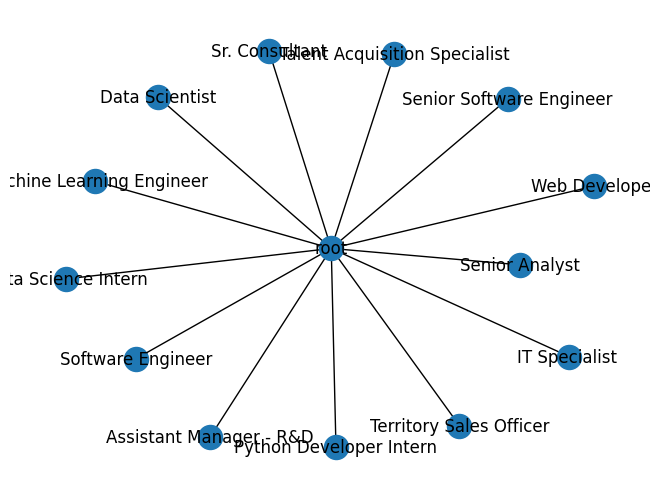

In [7]:
g = nx.Graph()
for _, row in df_post.iterrows():
    
    post = row['Position']
    count = row['count']

    #title = f"{post} - {count}"
    #hover_info = title

    g.add_node(post)
    g.add_edge('root', post, color = 'gray')
    #root is the vcentral node, consider yourself here
    

nx.draw_spring(g, with_labels = True) #default

In [9]:
df_co = df['Company'].value_counts().reset_index()
df_co.columns = ['Company', 'count']
df_co = df_co.sort_values(by = "count", ascending = False)
df_co.head(5)

,Company,count
0,VisionNLP,1
13,Brane Enterprises pvt ltd,1
23,Anchanto,1
22,Accenture,1
21,Walmart,1


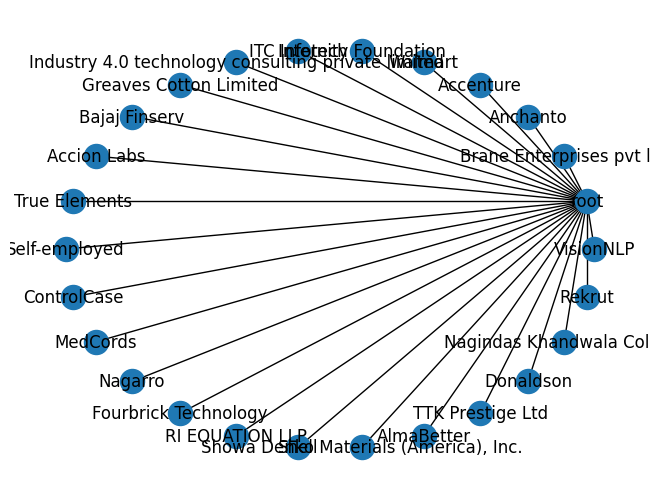

In [10]:
g = nx.Graph()
for _, row in df_co.iterrows():
    
    post = row['Company']
    count = row['count']

    #title = f"{post} - {count}"
    #hover_info = title

    g.add_node(post)
    g.add_edge('root', post)
    #root is the vcentral node, consider yourself here
    

nx.draw_circular(g, with_labels = True)

In [ ]:
#!python -V 
#!python --version